<img src='https://github.com/wekeo/ai4EM_MOOC/raw/04147f290cfdcce341f819eab7ad037b95f25600/img/ai4eo_logos.jpg' alt='Logo EU Copernicus WEkEO' align='center' width='100%'></img>


# WEKEO HYDROLOGY TRAINING

<div style="text-align: right"><i>  </i></div>

***
<center><h1> Comparison of Extreme Precipitation Indicators </h1></center>

***
**General Note 1**: Execute each cell through the <button class="btn btn-default btn-xs"><i class="icon-play fa fa-play"></i></button> button from the top MENU (or keyboard shortcut `Shift` + `Enter`).<br>
<br>
**General Note 2**: If, for any reason, the kernel is not working anymore, in the top MENU, click on the <button class="btn btn-default btn-xs"><i class="fa fa-repeat icon-repeat"></i></button> button. Then, in the top MENU, click on "Run" and select "Run All Above Selected Cell".<br>

**General Note 3**: To explore more (Python and R) content, there is our [**Jupyter Catalogue**](https://notebooks.apps.mercator.dpi.wekeo.eu/), and if you seek support, there are plenty of useful resources in our [**Help Center**](https://help.wekeo.eu/en/). Feel free to contact us using our [**live chat widget**](https://www.wekeo.eu/support) or asynchronously at [support@wekeo.eu](support@wekeo.eu) ! <br>

***

# Table of contents
- [1. Introduction](#1.-Introduction)
- [2. Setting up the Python environment](#2.-Setting-up-the-Python-environment)
    - [2.1 Required Python modules](#2.1-Required-Python-modules)
- [3. Data Access](#3.-Data-Access)
    - [3.1. Presentation of the product used](#3.1.-Presentation-of-the-product-used)
    - [3.2. Retrieving the data](#3.2.-Retrieving-the-data)
- [4. Exploring the dataset](#4.-Exploring-the-dataset)
    - [4.1. First look at the data](#4.1.-First-look-at-the-data)
    - [4.2. Pre-processing and first plot](#4.2.-Pre-processing-and-first-plot)
- [5. Computing Extreme Precipitation Indicators](#5.-Computing-Extreme-Precipitation-Indicators)
- [6. Comparison with future climate projections](#6.-Comparison-with-future-climate-projections)
- [7. Regional changes in extreme precipitations](#7.-Regional-changes-in-extreme-precipitations)
  - [7.1 Handling a GeoDataset](#7.1-Handling-a-GeoDataset)
  - [7.2 Changes over the Mediterranean](#7.2-Changes-over-the-Mediterranean)
- [8. Conclusion](#8.-Conclusion)
- [9. Exercises](#9.-Exercises)



# 1. Introduction

[Go back to the "Table of contents"](#Table-of-contents)


The atmosphere plays a fundamental role in regulating Earth’s climate, influencing temperature, precipitation, and extreme weather events. Precipitation, as a key component of the water cycle, varies across regions and timescales, shaping ecosystems, water resources, and human activities. Understanding how precipitation patterns may change under future climate scenarios is crucial for anticipating potential impacts on agriculture, infrastructure, and natural disasters.

In this workshop, we will use Python to analyze precipitation data from both current climate conditions and high-CO₂ climate simulations. A key focus will be on extreme precipitation indicators, which help quantify changes in heavy rainfall events. By comparing these indicators across climate scenarios, we can assess how increasing greenhouse gas concentrations may alter precipitation extremes.

Such analyses are essential for improving climate resilience, guiding adaptation strategies, and informing policy decisions. By leveraging computational tools and climate datasets, we gain valuable insights into future risks and challenges posed by a changing atmosphere.


| <img src="img/namibia_rainstorm_photo.jpg" width="800"> | 
|:--:| 
| Heavy Rain in Namibia and South Africa. From [NASA Earth Observatory](https://earthobservatory.nasa.gov/images/50573/heavy-rain-in-namibia-and-south-africa). |




# 2. Setting up the Python environment
[Go back to the "Table of contents"](#Table-of-contents)

## 2.1 Required Python modules
[Go back to the "Table of contents"](#Table-of-contents)

The Jupyter Notebook must be set up with all the necessary available tools from the Jupyter Notebook ecosystem. Here is the list of the modules we will be using in this exercise.

| Module name | Description |
| :---: | :---|
| **numpy** | [NumPy](https://numpy.org/) is the fundamental package for scientific computing with Python and for managing ND-arrays. |
| **xarray** | [Xarray](http://xarray.pydata.org/en/stable/) is a very user friendly library to manipulate NetCDF files within Python. It introduces labels in the form of dimensions, coordinates and attributes on top of raw NumPy-like arrays, which allows for a more intuitive, more concise, and less error-prone developer experience. |
| **matplotlib** |[Matplotlib](https://matplotlib.org/) is a Python 2D plotting library which produces high quality figures. |
| **cartopy** |[Cartopy](https://scitools.org.uk/cartopy/docs/latest/) is a library for plotting maps and geospatial data analyses in Python. |
|**geopandas**|[Geopandas](https://geopandas.org/en/stable/) is a library that allows spatial operation on geometric data.|
|**rasterio**|[Rasterio](https://rasterio.readthedocs.io/en/stable/) is a powerful tool for reading, writing, analyzing, and manipulating geospatial raster data, leveraging Python's capabilities and supporting formats like GeoTIFF with ease.|

In [1]:
# Modules system
import warnings
warnings.filterwarnings('ignore')
import getpass
import os
from pathlib import Path

# Modules related to data retrieving
from hda import Client
import json

# Modules related to plot and EO data manipulation
import numpy as np
import xarray as xr
import rioxarray
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import cartopy.crs as ccrs
import cartopy.feature as cfeature

import pandas as pd
import geopandas as gpd
import glob

# 3. Data Access

[Go back to the "Table of contents"](#Table-of-contents)


## 3.1. Presentation of the product used

[Go back to the "Table of contents"](#Table-of-contents)


From the WEkEO [Data Viewer](https://www.wekeo.eu/data?view=viewer), you can explore all the products available with many filters to select the region you are interested in, the parameters you want to study, etc.

In this section, we are going to use the ["CMIP5 daily data on single levels"](https://wekeo.copernicus.eu/data?view=dataset&dataset=EO%3AECMWF%3ADAT%3APROJECTIONS_CMIP5_DAILY_SINGLE_LEVELS) product. presents daily climate projections at a single vertical level, derived from numerous experiments, models, ensemble members, and time periods within the framework of the fifth phase of the Coupled Model Intercomparison Project (CMIP5). "Single levels" refer to variables computed at a specific vertical level, such as the surface (or near-surface) or a designated atmospheric pressure level, excluding multiple vertical levels. CMIP5 data play a crucial role in the Intergovernmental Panel on Climate Change (IPCC) Assessment Reports, including the most recent, AR5, published in 2014.

For this training, we will only be using the "precipitation flux" variable.


| Parameter | Value |
| :---: | :---|
| **Variables used** | pr |
| **Product identifier** |[EO:ECMWF:DAT:PROJECTIONS_CMIP5_DAILY_SINGLE_LEVELS](https://wekeo.copernicus.eu/data?view=dataset&dataset=EO%3AECMWF%3ADAT%3APROJECTIONS_CMIP5_DAILY_SINGLE_LEVELS) |
|Model Used| IPSL CM5A LR|
| **Temporal resolution** | Daily |
| **Spatial resolution** | 1.9° x 3.75°  |
| **Temporal coverage AMIP** | 1979 - 2009 |
| **Temporal coverage RCP8.5** | 2006 - 2205 |


<center>
    <img src="img/cmip5_th.jpeg" width="300">
</center>

You can also visit the [ECMWF](https://cds.climate.copernicus.eu/datasets/projections-cmip5-daily-single-levels?tab=overview) dedicated to the product to see more detail about the product and more detailed documentation.


## 3.2. Retrieving the data

[Go back to the "Table of contents"](#Table-of-contents)

There are many ways to [download data in WEkEO](https://help.wekeo.eu/en/articles/6416936-how-to-download-wekeo-data). You can do it manually from the [Data Viewer](https://www.wekeo.eu/data?view=viewer), but here we will download data through Python, using the Harmonized Data Access (HDA) API provided by WEkEO. The HDA client provides a fully compliant Python3 client that can be used to search and download products using the Harmonized Data Access WEkEO API.


First you need to make sure you have a `.hdarc` saved in your root directory. Follow the method described [here](https://help.wekeo.eu/en/articles/6751608-how-to-use-the-hda-api-in-python#h_e1d774cae9). 

📌 **Note**: For the sake of convenience, you can run the following cell to generate it automatically:



In [2]:
# Modules related to data retrieving
from hda import Client
import json

from pathlib import Path

# Default location expected by hda package
hdarc = Path(Path.home() / '.hdarc')

# Create it only if it does not already exists
if not hdarc.is_file():
    import getpass
    USERNAME = input('Enter your username: ')
    PASSWORD = getpass.getpass('Enter your password: ')

    with open(Path.home() / '.hdarc', 'w') as f:
        f.write(f'user:{USERNAME}\n')
        f.write(f'password:{PASSWORD}\n')

hda_client = Client()

You are now ready to download data. We write the API request, i.e. specify which product we want, which parameters, etc. The request we have used to download the data can be found in the `data` folder, file `data/atm/atm_req.json`. You can read it and modify it by right clicking on the file and then selecting "Open With -> Editor".

To write a new request, the easiest way is to select your data parameters in the [WEkEO Data Explorer](https://www.wekeo.eu/data), click on [`Show API request` (HowTo)](https://help.wekeo.eu/en/articles/6416936-how-to-download-wekeo-data#h_85849dcd7a), and copy/paste it in a file (or directly in a notebook cell).

<center>
    <img src="img/data_req.png" width="300">
</center>

Let's visualize our request.

In [24]:
# Loading request from json file (September S2 image)
with open('./data/precip_req.json', 'r') as f:
    data = json.load(f)
data


{'dataset_id': 'EO:ECMWF:DAT:PROJECTIONS_CMIP5_DAILY_SINGLE_LEVELS',
 'experiment': 'amip',
 'variable': ['mean_precipitation_flux'],
 'model': 'ipsl_cm5a_lr',
 'ensemble_member': 'r1i1p1',
 'period': ['19790101-20091231'],
 'itemsPerPage': 200,
 'startIndex': 0}

Running the next cell will launch [**the downloading of the data (more details)**](https://help.wekeo.eu/en/articles/6751608-how-to-use-the-hda-api-in-python#h_605d4bdc05). Depending on the product and request, it may take some time. 


In [30]:
### Retrieve data
## Path to local data storage
output_path = 'data'

## Run the search with query
matches = hda_client.search(data)

## Print results
print(matches)


SearchResults[items=1,volume=ND]


In [32]:
matches.download(output_path)

# 4. Exploring the dataset

[Go back to the "Table of contents"](#Table-of-contents)


## 4.1. First look at the data

[Go back to the "Table of contents"](#Table-of-contents)

We have downloaded the needed data. The location of the file is : `data/pr_day_IPSL-CM5A-LR_amip_r1i1p1_19790101-20091231.nc`. Let's now open it using the **xarray** library.

This first dataset is a simulation called AMIP (Atmospheric Model Intercomparison Project), which will serve as a fairly accurate representation of the current climate.

In [2]:
# experiment CMIP5

ds = xr.open_dataset('data/pr_day_IPSL-CM5A-LR_amip_r1i1p1_19790101-20091231.nc')
ds

<xarray.Dataset> Size: 417MB
Dimensions:    (time: 11315, bnds: 2, lat: 96, lon: 96)
Coordinates:
  * time       (time) object 91kB 1979-01-01 12:00:00 ... 2009-12-31 12:00:00
  * lat        (lat) float64 768B -90.0 -88.11 -86.21 ... 86.21 88.11 90.0
  * lon        (lon) float64 768B 0.0 3.75 7.5 11.25 ... 345.0 348.8 352.5 356.2
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) object 181kB ...
    lat_bnds   (lat, bnds) float64 2kB ...
    lon_bnds   (lon, bnds) float64 2kB ...
    pr         (time, lat, lon) float32 417MB ...
Attributes: (12/28)
    institution:            IPSL (Institut Pierre Simon Laplace, Paris, France)
    institute_id:           IPSL
    experiment_id:          amip
    source:                 IPSL-CM5A-LR (2010) : atmos : LMDZ4 (LMDZ4_v5, 96...
    model_id:               IPSL-CM5A-LR
    forcing:                Nat,Ant,GHG,SA,Oz,LU,SS,Ds,BC,MD,OC,AA
    ...                     ...
    table_id:               Table day (10 February 2011) 80e409bd73611e9d25d0...
    title:                  IPSL-CM5A-LR model output prepared for CMIP5 AMIP
    parent_experiment:      N/A
    modeling_realm:         atmos
    realization:            1
    cmor_version:           2.5.1

## 4.2. Pre-processing and first plot

[Go back to the "Table of contents"](#Table-of-contents)

To make the next computations easier, we will drop a few variables that may trigger errors : `lat_bnds`, `lon_bnds`, `time_bnds`. We want to use a dataset with only `lon`, `lat` and `time` dimensions.

Next, we will compute the *total daily precipitation* from the mean flux. This conversion simply consists in multiplying the precipitation flux (in $kg.m^{-2}.s^{-1}$, equivalent to $mm.s^{-1}$), by the number of seconds in a day (86400). This will filed the daily precipitation in $mm$.

Finally, we will convert the *time* variable to the standard *datetime* format, which is fit for Python computation.

In [3]:
ds = ds.drop_vars(['time_bnds', 'lat_bnds', 'lon_bnds'])


In [4]:
# compute total precipitation

ds['tp'] = ds.pr*86400
ds

<xarray.Dataset> Size: 1GB
Dimensions:  (time: 11315, lat: 96, lon: 96)
Coordinates:
  * time     (time) object 91kB 1979-01-01 12:00:00 ... 2009-12-31 12:00:00
  * lat      (lat) float64 768B -90.0 -88.11 -86.21 -84.32 ... 86.21 88.11 90.0
  * lon      (lon) float64 768B 0.0 3.75 7.5 11.25 ... 345.0 348.8 352.5 356.2
Data variables:
    pr       (time, lat, lon) float32 417MB 1.729e-06 1.729e-06 ... 7.437e-06
    tp       (time, lat, lon) float64 834MB 0.1494 0.1494 ... 0.6425 0.6425
Attributes: (12/28)
    institution:            IPSL (Institut Pierre Simon Laplace, Paris, France)
    institute_id:           IPSL
    experiment_id:          amip
    source:                 IPSL-CM5A-LR (2010) : atmos : LMDZ4 (LMDZ4_v5, 96...
    model_id:               IPSL-CM5A-LR
    forcing:                Nat,Ant,GHG,SA,Oz,LU,SS,Ds,BC,MD,OC,AA
    ...                     ...
    table_id:               Table day (10 February 2011) 80e409bd73611e9d25d0...
    title:                  IPSL-CM5A-LR model output prepared for CMIP5 AMIP
    parent_experiment:      N/A
    modeling_realm:         atmos
    realization:            1
    cmor_version:           2.5.1

In [5]:
# time variable conversion

datetimeindex = ds.indexes['time'].to_datetimeindex()
ds['time'] = datetimeindex
ds

<xarray.Dataset> Size: 1GB
Dimensions:  (time: 11315, lat: 96, lon: 96)
Coordinates:
  * time     (time) datetime64[ns] 91kB 1979-01-01T12:00:00 ... 2009-12-31T12...
  * lat      (lat) float64 768B -90.0 -88.11 -86.21 -84.32 ... 86.21 88.11 90.0
  * lon      (lon) float64 768B 0.0 3.75 7.5 11.25 ... 345.0 348.8 352.5 356.2
Data variables:
    pr       (time, lat, lon) float32 417MB 1.729e-06 1.729e-06 ... 7.437e-06
    tp       (time, lat, lon) float64 834MB 0.1494 0.1494 ... 0.6425 0.6425
Attributes: (12/28)
    institution:            IPSL (Institut Pierre Simon Laplace, Paris, France)
    institute_id:           IPSL
    experiment_id:          amip
    source:                 IPSL-CM5A-LR (2010) : atmos : LMDZ4 (LMDZ4_v5, 96...
    model_id:               IPSL-CM5A-LR
    forcing:                Nat,Ant,GHG,SA,Oz,LU,SS,Ds,BC,MD,OC,AA
    ...                     ...
    table_id:               Table day (10 February 2011) 80e409bd73611e9d25d0...
    title:                  IPSL-CM5A-LR model output prepared for CMIP5 AMIP
    parent_experiment:      N/A
    modeling_realm:         atmos
    realization:            1
    cmor_version:           2.5.1

We can now take a look a some global precipitation patterns.

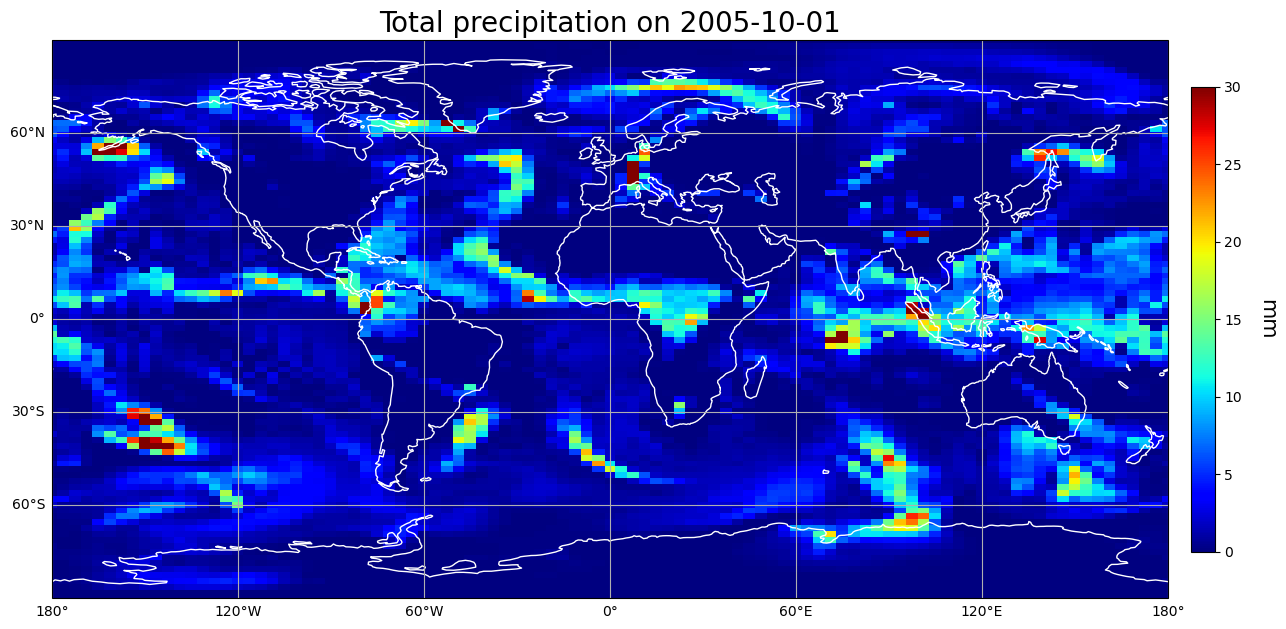

In [6]:
# select date and plot map

# Select the total precipitation parameter, at the date we want, and store it in a variable.
# Define a date that is available in the product
date_plot='2005-10-01'
temp_map = ds['tp'].sel(time=date_plot, method='nearest').squeeze()

# Define the caracteristics of the plot
f = plt.figure(figsize=(15, 8))                                                   # create a figure and define its size
ax = plt.axes(projection=ccrs.PlateCarree())                                       # create an ax and select the projection of the map
ax.coastlines(color='w')                                                                    # add the coastlines
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True)                        # add the longitude / latitude lines
gl.right_labels = False                                                            # remove latitude labels on the right
gl.top_labels = False                                                              # remove longitude labels on the top
ax.add_feature(cfeature.LAND, zorder=1, edgecolor='w')                             # add land mask

# Plot the sea surface temperature, set the min/max values of the colorbar and the colormap to use
im = ax.pcolor(temp_map['lon'].data, temp_map['lat'].data,temp_map, cmap='jet', vmin=0, vmax = 30)


# Add the titles and legend
ax.set_title('Total precipitation on {}'.format(date_plot[:10]),fontsize=20, y=1)              # add a title to the figure
cbar = f.colorbar(im,ax=ax,fraction=0.02, pad=0.02)                                            # add the colorbar
cbar.set_label('mm', rotation=270,fontsize=15, labelpad=25)                                    # add the title of the colorbar

# Save figure
#plt.savefig('out/temp_map.png')


# 5. Computing Extreme Precipitation Indicators

[Go back to the "Table of contents"](#Table-of-contents)


In this section, we will try to represent extreme precipitations using various indicators. Those indicators are defined in the [European Climate Assessment & Dataset project](https://www.ecad.eu/indicesextremes/indicesdictionary.php). For this training we have chosen 3 simple extreme precipitation indicators, computed at a **yearly frequency** :
*  SDII (Daily Intensity Index) : Mean precipitation amount during wet days.
*  R20mm (Very Heavy precipitation days) : Frequency of days with precipitation > 20 mm
*  RX1DAY (Highest 1 day precipitation amount) : Maximum daily precpitation value over the chosen period.


In [7]:
# SDII 
def compute_sdii(ds):
    tp_gt_1 = ds.tp.where(ds.tp > 1)
    SDII = tp_gt_1.resample(time="Y").mean(dim="time")
    return SDII

SDII = compute_sdii(ds)

#R20mm
def compute_r20mm(ds):
    tp_gt_20 = ds.tp.where(ds.tp > 20)
    R20mm = tp_gt_20.resample(time="Y").count(dim="time")
    return R20mm

R20mm = compute_r20mm(ds)

# Rx1day

def compute_rx1day(ds):
    return ds.tp.resample(time="Y").max(dim="time")

RX1DAY = compute_rx1day(ds)


Let's compute the climatologies over the 1979-2009 period for all those indicators.

In [8]:
# computing climatology across the period :

SDII_clim = SDII.mean(dim='time')
R20mm_clim = R20mm.mean(dim='time')
RX1DAY_clim = RX1DAY.mean(dim='time')

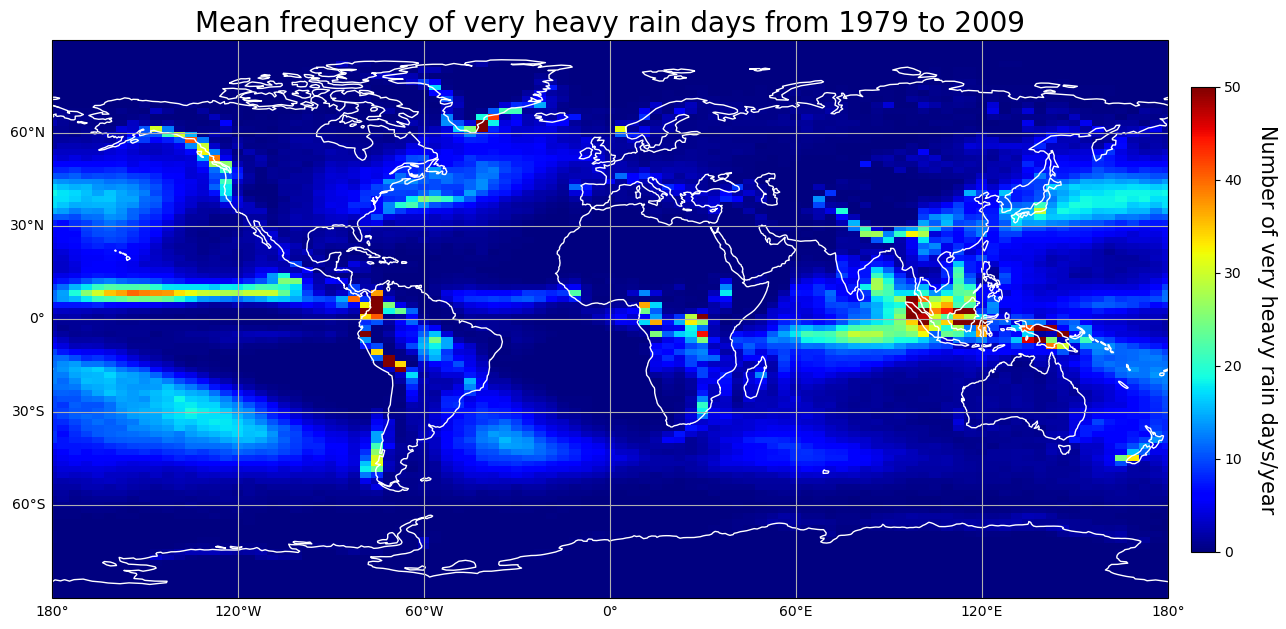

In [9]:

# Define the caracteristics of the plot
f = plt.figure(figsize=(15, 8))                                                   # create a figure and define its size
ax = plt.axes(projection=ccrs.PlateCarree())                                       # create an ax and select the projection of the map
ax.coastlines(color='w')                                                                    # add the coastlines
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True)                        # add the longitude / latitude lines
gl.right_labels = False                                                            # remove latitude labels on the right
gl.top_labels = False                                                              # remove longitude labels on the top
ax.add_feature(cfeature.LAND, zorder=1, edgecolor='w')                             # add land mask

# Plot the sea surface temperature, set the min/max values of the colorbar and the colormap to use
im = ax.pcolor(R20mm_clim['lon'].data, R20mm_clim['lat'].data,R20mm_clim, cmap='jet', vmin=0, vmax = 50)


# Add the titles and legend
ax.set_title('Mean frequency of very heavy rain days from 1979 to 2009',fontsize=20, y=1)              # add a title to the figure
cbar = f.colorbar(im,ax=ax,fraction=0.02, pad=0.02)                                            # add the colorbar
cbar.set_label('Number of very heavy rain days/year', rotation=270,fontsize=15, labelpad=25)                                    # add the title of the colorbar

# Save figure
#plt.savefig('out/temp_map.png')

In this example, we observe that most of the areas having a high number of very heavy rain days per year are located around the equator, in the central Pacific Ocean and South East Asia. Those regions are indeed known to have very humid climates.

# 6. Comparison with future climate projections

[Go back to the "Table of contents"](#Table-of-contents)


In this sections, we will compare the previoulsy computed indicators with a simulation representing a future climate with a high-concentration of atmospheric carbon dioxyde. Namely, we will use an experiment simulating the **RCP8.5** scenario from the IPCC, often described as the "worst case scenario" in terms of carbon emissions . This simulation is computed using the same model as in the previous section, only with different inputs regarding radiative forcings, the API request can be found here : `data/precip_req2.json`

This time we are using long-term projections, our 30 year will cover the 2129-2159 period.

In [10]:
ds_2 = xr.open_dataset('data/pr_day_IPSL-CM5A-LR_rcp85_r1i1p1_20060101-22051231.nc').sel(time=slice('2129', '2159'))
ds_2

<xarray.Dataset> Size: 417MB
Dimensions:    (time: 11315, bnds: 2, lat: 96, lon: 96)
Coordinates:
  * time       (time) object 91kB 2129-01-01 12:00:00 ... 2159-12-31 12:00:00
  * lat        (lat) float64 768B -90.0 -88.11 -86.21 ... 86.21 88.11 90.0
  * lon        (lon) float64 768B 0.0 3.75 7.5 11.25 ... 345.0 348.8 352.5 356.2
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) object 181kB ...
    lat_bnds   (lat, bnds) float64 2kB ...
    lon_bnds   (lon, bnds) float64 2kB ...
    pr         (time, lat, lon) float32 417MB ...
Attributes: (12/28)
    institution:            IPSL (Institut Pierre Simon Laplace, Paris, France)
    institute_id:           IPSL
    experiment_id:          rcp85
    source:                 IPSL-CM5A-LR (2010) : atmos : LMDZ4 (LMDZ4_v5, 96...
    model_id:               IPSL-CM5A-LR
    forcing:                Nat,Ant,GHG,SA,Oz,LU,SS,Ds,BC,MD,OC,AA
    ...                     ...
    table_id:               Table day (10 February 2011) 80e409bd73611e9d25d0...
    title:                  IPSL-CM5A-LR model output prepared for CMIP5 RCP8.5
    parent_experiment:      historical
    modeling_realm:         atmos
    realization:            1
    cmor_version:           2.7.1

Performing the same pre-processing as before.

In [11]:
ds_2 = ds_2.drop_vars(['time_bnds', 'lat_bnds', 'lon_bnds'])

In [12]:
ds_2['tp'] = ds_2.pr * 86400

datetimeindex = ds_2.indexes['time'].to_datetimeindex()
ds_2['time'] = datetimeindex


We will compute the same ECA indicators as with the AMIP experiment, and compare the present and future climatologies.

In [13]:
# computing ECA indices

SDII_2 = compute_sdii(ds_2)
R20mm_2 = compute_r20mm(ds_2)
RX1DAY_2 = compute_rx1day(ds_2)

SDII_2_clim = SDII_2.mean(dim='time')
R20mm_2_clim = R20mm_2.mean(dim='time')
RX1DAY_2_clim = RX1DAY_2.mean(dim='time')


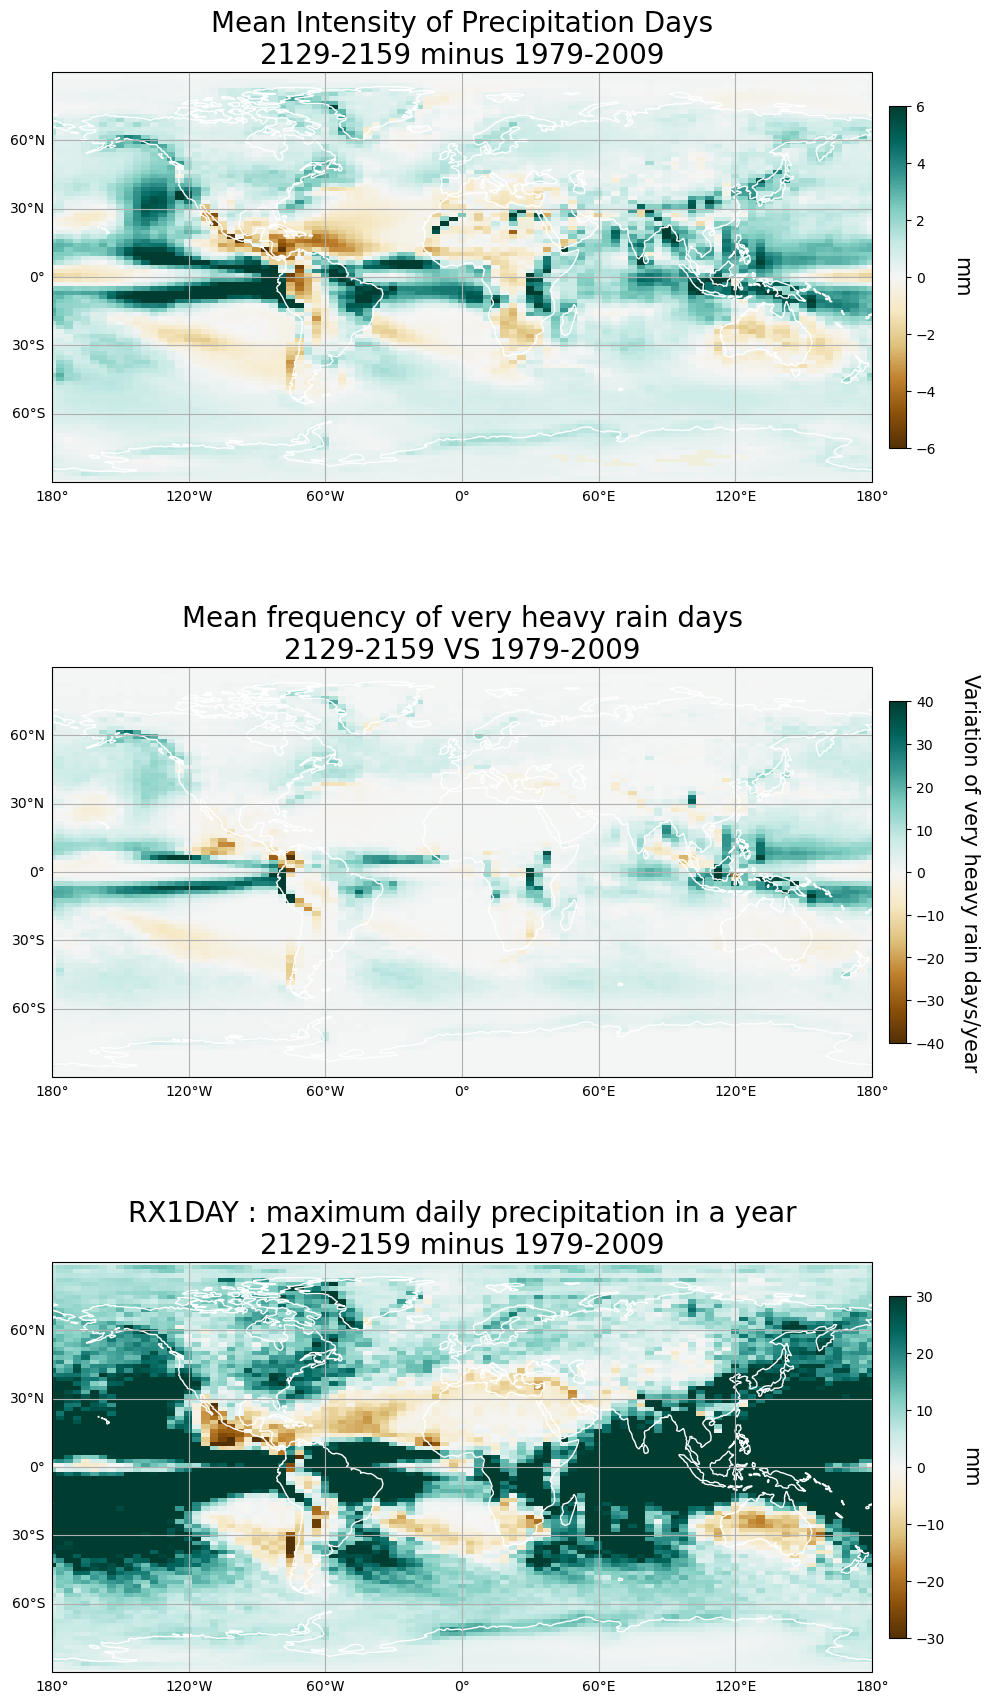

In [14]:
# substracting climatologies !

# Define the caracteristics of the plot
f = plt.figure(figsize=(10, 18))                                                   # create a figure and define its size
ax1 = plt.subplot(311, projection=ccrs.PlateCarree())                                       # create an ax and select the projection of the map
ax1.coastlines(color='w')                                                                    # add the coastlines
gl = ax1.gridlines(crs=ccrs.PlateCarree(), draw_labels=True)                        # add the longitude / latitude lines
gl.right_labels = False                                                            # remove latitude labels on the right
gl.top_labels = False                                                              # remove longitude labels on the top
ax1.add_feature(cfeature.LAND, zorder=1, edgecolor='w')                             # add land mask

# Plot the sea surface temperature, set the min/max values of the colorbar and the colormap to use
im = ax1.pcolor(R20mm_clim['lon'].data, R20mm_clim['lat'].data,SDII_2_clim-SDII_clim, cmap='BrBG', vmin=-6, vmax=6)


# Add the titles and legend
ax1.set_title('Mean Intensity of Precipitation Days\n2129-2159 minus 1979-2009',fontsize=20, y=1)              # add a title to the figure
cbar = f.colorbar(im,ax=ax1,fraction=0.02, pad=0.02)                                            # add the colorbar
cbar.set_label('mm', rotation=270,fontsize=15, labelpad=25)                                    # add the title of the colorbar



# Define the caracteristics of the plot
ax2 = plt.subplot(312, projection=ccrs.PlateCarree())                                       # create an ax and select the projection of the map
ax2.coastlines(color='w')                                                                    # add the coastlines
gl = ax2.gridlines(crs=ccrs.PlateCarree(), draw_labels=True)                        # add the longitude / latitude lines
gl.right_labels = False                                                            # remove latitude labels on the right
gl.top_labels = False                                                              # remove longitude labels on the top
ax2.add_feature(cfeature.LAND, zorder=1, edgecolor='w')                             # add land mask

# Plot the sea surface temperature, set the min/max values of the colorbar and the colormap to use
im = ax2.pcolor(R20mm_clim['lon'].data, R20mm_clim['lat'].data,R20mm_2_clim-R20mm_clim, cmap='BrBG', vmin=-40, vmax=40)


# Add the titles and legend
ax2.set_title('Mean frequency of very heavy rain days\n2129-2159 VS 1979-2009',fontsize=20, y=1)              # add a title to the figure
cbar = f.colorbar(im,ax=ax2,fraction=0.02, pad=0.02)                                            # add the colorbar
cbar.set_label('Variation of very heavy rain days/year', rotation=270,fontsize=15, labelpad=25)                                    # add the title of the colorbar



# Define the caracteristics of the plot
ax3 = plt.subplot(313, projection=ccrs.PlateCarree())                                       # create an ax and select the projection of the map
ax3.coastlines(color='w')                                                                    # add the coastlines
gl = ax3.gridlines(crs=ccrs.PlateCarree(), draw_labels=True)                        # add the longitude / latitude lines
gl.right_labels = False                                                            # remove latitude labels on the right
gl.top_labels = False                                                              # remove longitude labels on the top
ax3.add_feature(cfeature.LAND, zorder=1, edgecolor='w')                             # add land mask

# Plot the sea surface temperature, set the min/max values of the colorbar and the colormap to use
im = ax3.pcolor(R20mm_clim['lon'].data, R20mm_clim['lat'].data,RX1DAY_2_clim-RX1DAY_clim, cmap='BrBG', vmin=-30, vmax = 30)


# Add the titles and legend
ax3.set_title('RX1DAY : maximum daily precipitation in a year\n2129-2159 minus 1979-2009',fontsize=20, y=1)              # add a title to the figure
cbar = f.colorbar(im,ax=ax3,fraction=0.02, pad=0.02)                                            # add the colorbar
cbar.set_label('mm', rotation=270,fontsize=15, labelpad=25)                                    # add the title of the colorbar


plt.tight_layout()

We can see that in a high CO2 emission scenario, precipitation patterns undergo several changes. In most areas, we observe that wet days tend to be more intense, except in the Saharan Desert, Central America ou Australia.

As these impacts are not homogeneously distributed, let's focus on a particular region to convey our analysis.

# 7. Regional changes in extreme precipitations

[Go back to the "Table of contents"](#Table-of-contents)


To convey the analysis on a local scale, we are going to clip the datasets that we have used. The IPCC has split the wolrd into several climate regions, we will use these delimitations to clip the climatologies.

We have downloaded the IPCC regions from [this page](https://www.ipcc-data.org/guidelines/pages/ar5_regions.html).

## 7.1 Handling a GeoDataset

[Go back to the "Table of contents"](#Table-of-contents)



In [15]:
# opening the IPPC regions dataset

gdf = gpd.read_file('data/reference_regions/referenceRegions.shp')
gdf

,NAME,LAB,USAGE,geometry
0,Alaska/N.W. Canada [ALA:1],ALA,land,"POLYGON ((-105 60, -168 60, -168 72.6, -105 72..."
1,Amazon [AMZ:7],AMZ,land,"POLYGON ((-66.4 -20, -79.7 -1.2, -68.8 11.4, -..."
2,Central America/Mexico [CAM:6],CAM,land,"POLYGON ((-68.8 11.4, -79.7 -1.2, -118.3 28.6,..."
3,small islands regions Caribbean,CAR*,all,"POLYGON ((-68.8 11.4, -85.8 25, -60 25, -60 11..."
4,Central Asia [CAS:20],CAS,land,"POLYGON ((60 30, 60 50, 75 50, 75 30, 60 30))"
5,Central Europe [CEU:12],CEU,land,"POLYGON ((-10 45, -10 48, 40 61.3, 40 45, -10 ..."
6,Canada/Greenland/Iceland [CGI:2],CGI,land,"POLYGON ((-10 50, -105 50, -105 85, -10 85, -1..."
7,Central North America [CNA:4],CNA,land,"POLYGON ((-85 50, -85 28.6, -105 28.6, -105 50..."
8,East Africa [EAF:16],EAF,land,"POLYGON ((25 -11.4, 25 15, 52 15, 52 -11.4, 25..."
9,East Asia [EAS:22],EAS,land,"POLYGON ((100 20, 100 50, 145 50, 145 20, 100 ..."


Geodatasets are easy to plot. Let's have visualize all these regions on the map, we will chose one afterwards.

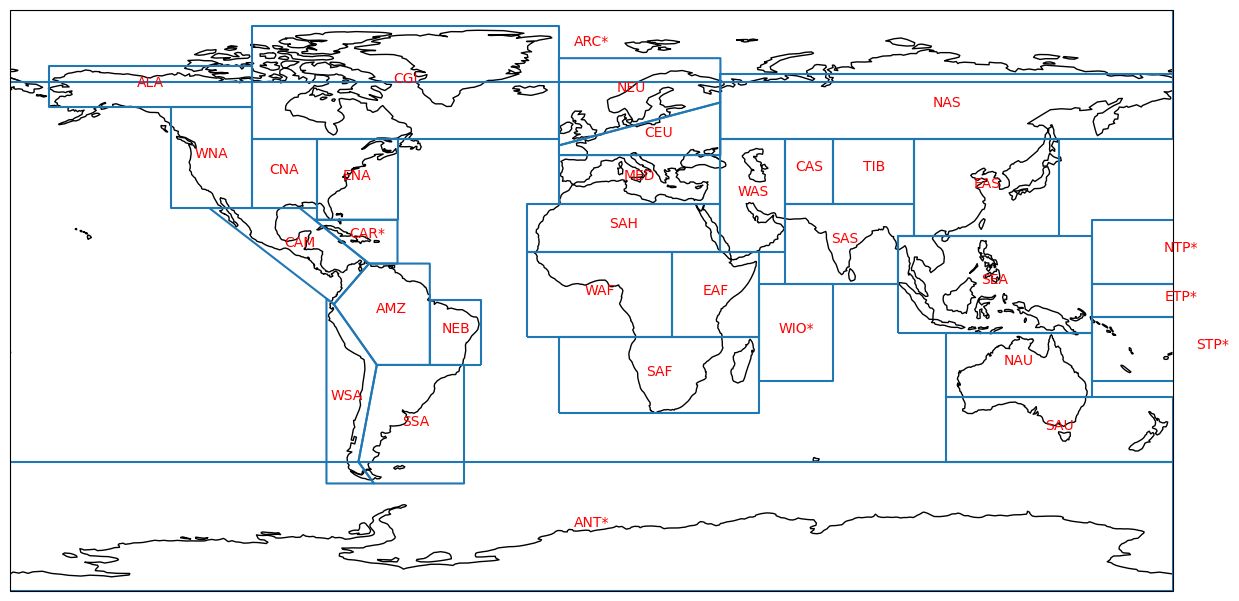

In [16]:
f = plt.figure(figsize=(15, 8))                                                   # create a figure and define its size
ax = plt.axes(projection=ccrs.PlateCarree())                                       # create an ax and select the projection of the map
ax.coastlines(color='k')  

gdf.boundary.plot(ax=ax)


# Add labels (using a column like 'name' for labeling)
for idx, row in gdf.iterrows():
    plt.text(row.geometry.centroid.x, row.geometry.centroid.y, 
             row["LAB"], fontsize=10, ha='center', color="red")

    

## 7.2 Changes over the Mediterranean

[Go back to the "Table of contents"](#Table-of-contents)


In this section, we will clip the data to the *MED* region. Some preprocessing has to be done on the xarray dataset before clipping. Using **rioxarray**, we will define the coordinate reference system of the dataset.

Once this is done we will :
*  clip each previously computed climatology to the MED region.
*  compute the year-to-year relative differences for each indicator between the 1979-2009 and 2129-2159 periods.
*  visualize the differences as boxplots

In [17]:
# retrieving the wolrd map to plot coastlines

url = "https://naciscdn.org/naturalearth/110m/cultural/ne_110m_admin_0_countries.zip"
world = gpd.read_file(url)

In [20]:
# chossing region
reg = 'SEA'

# computing SDII variations

SDII_clim.rio.set_spatial_dims(x_dim="lon", y_dim="lat", inplace=True)
SDII_clim.rio.write_crs("epsg:4326", inplace=True)

SDII_2.rio.set_spatial_dims(x_dim="lon", y_dim="lat", inplace=True)
SDII_2.rio.write_crs("epsg:4326", inplace=True)

SDII_clim_reg = SDII_clim.rio.clip(gdf[gdf.LAB==reg].geometry, gdf.crs, drop=True)
SDII_2_reg = SDII_2.rio.clip(gdf[gdf.LAB==reg].geometry, gdf.crs, drop=True)

SDII_dev = 100*(SDII_2_reg - SDII_clim_reg)/SDII_clim_reg

# computing R20mm variations


R20mm_clim.rio.set_spatial_dims(x_dim="lon", y_dim="lat", inplace=True)
R20mm_clim.rio.write_crs("epsg:4326", inplace=True)

R20mm_2.rio.set_spatial_dims(x_dim="lon", y_dim="lat", inplace=True)
R20mm_2.rio.write_crs("epsg:4326", inplace=True)

R20mm_clim_reg = R20mm_clim.rio.clip(gdf[gdf.LAB==reg].geometry, gdf.crs, drop=True)
R20mm_2_reg = R20mm_2.rio.clip(gdf[gdf.LAB==reg].geometry, gdf.crs, drop=True)

R20mm_dev = 100*(R20mm_2_reg - R20mm_clim_reg)/R20mm_clim_reg

# computing RX1DAY variations

RX1DAY_clim.rio.set_spatial_dims(x_dim="lon", y_dim="lat", inplace=True)
RX1DAY_clim.rio.write_crs("epsg:4326", inplace=True)

RX1DAY_2.rio.set_spatial_dims(x_dim="lon", y_dim="lat", inplace=True)
RX1DAY_2.rio.write_crs("epsg:4326", inplace=True)

RX1DAY_clim_reg = RX1DAY_clim.rio.clip(gdf[gdf.LAB==reg].geometry, gdf.crs, drop=True)
RX1DAY_2_reg = RX1DAY_2.rio.clip(gdf[gdf.LAB==reg].geometry, gdf.crs, drop=True)

RX1DAY_dev = 100*(RX1DAY_2_reg - RX1DAY_clim_reg)/RX1DAY_clim_reg


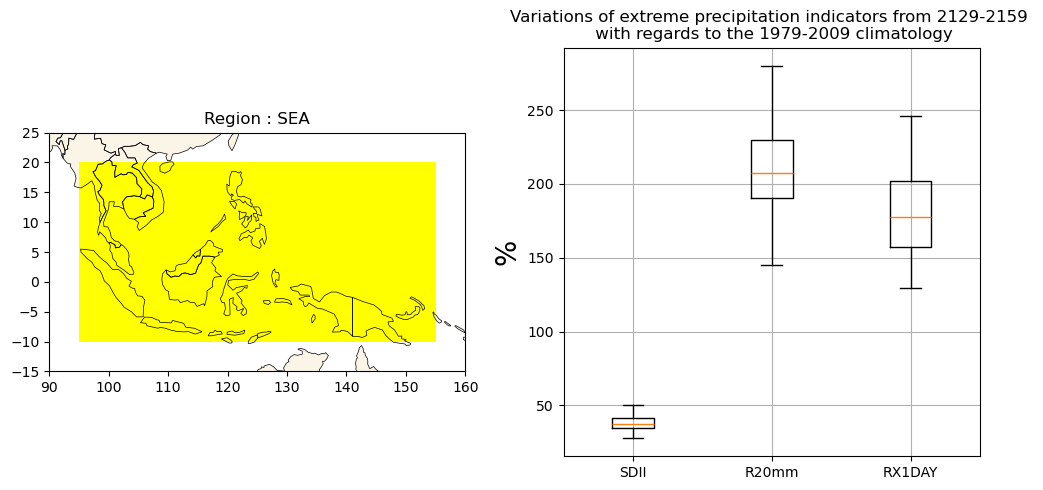

In [21]:
# plotting

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,5))

world.plot(ax=ax1, color='wheat', alpha=0.3)
world.boundary.plot(ax=ax1, color='k', linewidth=0.5)
gdf[gdf.LAB==reg].plot(ax=ax1, color='yellow')
ext = gdf[gdf.LAB==reg].iloc[0].geometry.bounds
ax1.set_xlim(ext[0] -5, ext[2] +5)
ax1.set_ylim(ext[1] -5, ext[3] +5)
ax1.set_title('Region : %s' %reg)

ax2.boxplot([SDII_dev.mean(dim=['lon', 'lat']), R20mm_dev.mean(dim=['lon', 'lat']), RX1DAY_dev.mean(dim=['lon', 'lat'])])
ax2.set_xticklabels(['SDII', 'R20mm', 'RX1DAY'])
ax2.set_title('Variations of extreme precipitation indicators from 2129-2159 \n with regards to the 1979-2009 climatology')
ax2.set_ylabel('%', fontsize=20)
plt.grid(True)

plt.tight_layout()

We can observe that the Mediterranean region is an area where extreme precipitations are expected to decrease a lot, with more than 50% less very heavy rain days per year (R20mm median relative difference), and 30% less intense precpitation maxima. However, with a general rain intensity also decreasing (SDII), this probably indicates an increase of droughts in the region.

This simulation does not describe the exact precipitation patterns that will take place in the future. It can however serve as a "high global warming" reference to highlight potential trajectories we may follow without efficient climate policies.

# 8. Conclusion

[Go back to the "Table of contents"](#Table-of-contents)

In this notebook we have computed several extreme precpipitation indicators, over several time periods, and examined how they behaved under a high CO2 emission scenario. The simulation shows that carbon dioxyde emissions lead to changes in precipitation patterns, especially at the extremes, with significant geographical variability.



# 9. Exercises

[Go back to the "Table of contents"](#Table-of-contents)

Here is a set of exercises we propose for you to go further into the analysis. There are 2 levels depending on how much Python code you need to write to answer the questions.

**Beginners** :

- In [Section 5](#5.-Computing-Extreme-Precipitation-Indicators), we drew the R20mm indicator for a specific date. Try plotting the other indicators at other dates to further explore the data.

- In [Section 7](#7.-Regional-changes-in-extreme-precipitations), we focused our analysis on the MED region, try re-running the section after selecting another region.

**Intermediate** :

- In [Section 5](#5.-Computing-Extreme-Precipitation-Indicators), we defined 3 yearly indicators for extreme precipitations. You can refer to the [European Climate Assessment & Dataset project](https://www.ecad.eu/indicesextremes/indicesdictionary.php) webpage to find other extreme precpipitation indicators. Try computing them as well to deepen the analysis (consecutive dry days, RX5days, etc).

- You will also see that there are indicators for several other variables (temperature, winds, etc). Using the same experiments, try retrieving those other variables and computing these indicators.

<div class="alert alert-block alert-success">
    <b>Congratulations !!</b><br>
  
--- 

##### **And thank you for your attention! :)** 
    
    
We hope you enjoyed this Jupyter Notebook training.

You now have plenty of tools to study extreme precipitations. Feel free to re-use and adapt all the Python scripts of this notebook to your needs! 

This training course is over but we'd love to hear from you about how we could improve it (topics, tools, storytelling, format, speed etc). If you have any question, do not hesitate to contact us using our [**live chat widget**](https://www.wekeo.eu/support) or asynchronously at [support@wekeo.eu](support@wekeo.eu) !


# Additional Information
---

#### Compatible Data Science Toolkits

In [74]:
import pkg_resources; pkg_resources.get_distribution("hda").version

'2.18'

In [75]:
import xarray; print(xarray.__version__)

2024.9.0


#### Last Modified and Tested

In [76]:
from datetime import date; print(date.today())

2024-11-19


<img src='https://github.com/wekeo/ai4EM_MOOC/raw/04147f290cfdcce341f819eab7ad037b95f25600/img/ai4eo_logos.jpg' alt='Logo EU Copernicus WEkEO' align='center' width='100%'></img>